<a href="https://colab.research.google.com/github/dustixbin/bhanumldl/blob/main/IBM_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
!pip install kaggle==1.5.16

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dustixbin","key":"10106be2db28b840c27e999952ce6687"}'}

In [4]:
import os
import shutil

# Create the .kaggle directory if it doesn't exist
os.makedirs("/root/.kaggle", exist_ok=True)

# Move kaggle.json to the .kaggle directory
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")


'/root/.kaggle/kaggle.json'

In [5]:
!pip install kaggle

In [6]:
!kaggle datasets download -d yeanzc/telco-customer-churn-ibm-dataset

telco-customer-churn-ibm-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
import zipfile

with zipfile.ZipFile("telco-customer-churn-ibm-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")

# List extracted files
os.listdir("dataset")


['Telco_customer_churn.xlsx']

In [8]:
import os
print(os.listdir())

['.config', 'telco-customer-churn-ibm-dataset.zip', 'dataset', 'sample_data']


In [9]:
import os
# List the files in the 'dataset' folder
extracted_files = os.listdir('dataset')
print(extracted_files)

['Telco_customer_churn.xlsx']


In [10]:
df = pd.read_excel('dataset/Telco_customer_churn.xlsx')
df1 = pd.read_excel('dataset/Telco_customer_churn.xlsx')

In [11]:
df1.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [12]:
df1 = df.copy(deep=True)

In [13]:
df1.drop(columns=['CLTV','Churn Score','Churn Reason','Churn Label'], inplace=True)
df1.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [14]:
df1.drop(columns = ['Count','Country'],inplace = True)

In [15]:
df1.drop(columns=['CustomerID'],inplace=True)
df1.head()

,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [16]:
df1['City'].unique()

array(['Los Angeles', 'Beverly Hills', 'Huntington Park', ..., 'Standish',
       'Tulelake', 'Olympic Valley'], dtype=object)

In [17]:
df1['City'].replace(' ','_',regex = True,inplace= True)
df1.head()

<ipython-input-17-c8a3b370f63f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['City'].replace(' ','_',regex = True,inplace= True)


,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,California,Los_Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,California,Los_Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,California,Los_Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,California,Los_Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,California,Los_Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [18]:
df1['City'].unique()[0:10]

array(['Los_Angeles', 'Beverly_Hills', 'Huntington_Park', 'Lynwood',
       'Marina_Del_Rey', 'Inglewood', 'Santa_Monica', 'Torrance',
       'Whittier', 'La_Habra'], dtype=object)

In [19]:
df1['Payment_Method'].replace(' ','_',regex = True,inplace = True)
df1.head()

KeyError: 'Payment_Method'

In [20]:
df1.columns = df1.columns.str.replace(' ','_')

In [21]:
df1.head()

,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,California,Los_Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,California,Los_Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,California,Los_Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,California,Los_Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,California,Los_Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [22]:
for col in df1.columns:
    missing_count = df1[col].isnull().sum()
    if missing_count > 0:
        print(f"Column '{col}' has {missing_count} missing values.")
    else:
      print(f"Column '{col}' has no missing values.")

print("\n")

Column 'State' has no missing values.
Column 'City' has no missing values.
Column 'Zip_Code' has no missing values.
Column 'Lat_Long' has no missing values.
Column 'Latitude' has no missing values.
Column 'Longitude' has no missing values.
Column 'Gender' has no missing values.
Column 'Senior_Citizen' has no missing values.
Column 'Partner' has no missing values.
Column 'Dependents' has no missing values.
Column 'Tenure_Months' has no missing values.
Column 'Phone_Service' has no missing values.
Column 'Multiple_Lines' has no missing values.
Column 'Internet_Service' has no missing values.
Column 'Online_Security' has no missing values.
Column 'Online_Backup' has no missing values.
Column 'Device_Protection' has no missing values.
Column 'Tech_Support' has no missing values.
Column 'Streaming_TV' has no missing values.
Column 'Streaming_Movies' has no missing values.
Column 'Contract' has no missing values.
Column 'Paperless_Billing' has no missing values.
Column 'Payment_Method' has n

In [23]:
len(df1.loc[df1['Total_Charges']==' '])

11

In [24]:
df1.loc[df1['Total_Charges']==' ']

,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,California,San_Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,No,Yes,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
2438,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,No,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
2568,California,San_Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,No,Yes,No,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
2667,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,No,Yes,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
2856,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,No,Yes,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
4331,California,Los_Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,No,Yes,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
4687,California,Sun_City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,No,Yes,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
5104,California,Ben_Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,No,Yes,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
5719,California,La_Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,No,Yes,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6772,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,No,Yes,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0


In [25]:
df1.loc[(df1['Total_Charges']==' '),'Total_Charges'] = 0

In [26]:
df1.loc[df1['Tenure_Months']== 0]

,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,California,San_Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,No,Yes,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,0
2438,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,No,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,0
2568,California,San_Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,No,Yes,No,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,0
2667,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,No,Yes,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,0
2856,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,No,Yes,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,0
4331,California,Los_Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,No,Yes,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,0
4687,California,Sun_City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,No,Yes,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,0
5104,California,Ben_Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,No,Yes,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,0
5719,California,La_Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,No,Yes,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,0
6772,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,No,Yes,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,0


In [27]:
df1['Total_Charges'] = pd.to_numeric(df1['Total_Charges'])

In [28]:
X = df1.drop(columns=['Churn_Value']).copy()
y = df1['Churn_Value'].copy()

In [29]:
X.head()

,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,...,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,California,Los_Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
1,California,Los_Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
2,California,Los_Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50
3,California,Los_Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05
4,California,Los_Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30


In [30]:
y.head()

,Churn_Value
0,1
1,1
2,1
3,1
4,1


In [31]:
pd.get_dummies(X,columns=['Payment_Method'],dtype=int).head()

,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,...,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Monthly_Charges,Total_Charges,Payment_Method_Bank transfer (automatic),Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check
0,California,Los_Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,...,No,No,Month-to-month,Yes,53.85,108.15,0,0,0,1
1,California,Los_Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,...,No,No,Month-to-month,Yes,70.70,151.65,0,0,1,0
2,California,Los_Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,...,Yes,Yes,Month-to-month,Yes,99.65,820.50,0,0,1,0
3,California,Los_Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,...,Yes,Yes,Month-to-month,Yes,104.80,3046.05,0,0,1,0
4,California,Los_Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,...,Yes,Yes,Month-to-month,Yes,103.70,5036.30,1,0,0,0


In [32]:
X.dtypes

,0
State,object
City,object
Zip_Code,int64
Lat_Long,object
Latitude,float64
Longitude,float64
Gender,object
Senior_Citizen,object
Partner,object
Dependents,object


In [33]:
for col in X.columns:
    if X[col].dtype == 'object':
        X = pd.get_dummies(X,columns=[col],dtype=int)

In [34]:
X.head()

,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,State_California,City_Acampo,City_Acton,City_Adelanto,...,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank transfer (automatic),Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check
0,90003,33.964131,-118.272783,2,53.85,108.15,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,90005,34.059281,-118.307420,2,70.70,151.65,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,90006,34.048013,-118.293953,8,99.65,820.50,1,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,90010,34.062125,-118.315709,28,104.80,3046.05,1,0,0,0,...,1,1,0,0,0,1,0,0,1,0
4,90015,34.039224,-118.266293,49,103.70,5036.30,1,0,0,0,...,1,1,0,0,0,1,1,0,0,0


In [35]:
sum(y)/len(y)

0.2653698707936959

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,stratify=y)

In [58]:
import xgboost as xgb

# Set early_stopping_rounds AND eval_metric during XGBClassifier initialization
clf_xgb = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='aucpr',
    seed=42,
)

# Then, just pass eval_set to the fit method
clf_xgb.fit(
    X_train,
    y_train,
    verbose=True,
    eval_set=[(X_test, y_test)]
)

[0]	validation_0-aucpr:0.64135
[1]	validation_0-aucpr:0.65171
[2]	validation_0-aucpr:0.65991
[3]	validation_0-aucpr:0.65350
[4]	validation_0-aucpr:0.65743
[5]	validation_0-aucpr:0.65051
[6]	validation_0-aucpr:0.65827
[7]	validation_0-aucpr:0.65980
[8]	validation_0-aucpr:0.65751
[9]	validation_0-aucpr:0.65389
[10]	validation_0-aucpr:0.65572
[11]	validation_0-aucpr:0.65920
[12]	validation_0-aucpr:0.66010
[13]	validation_0-aucpr:0.65963
[14]	validation_0-aucpr:0.65877
[15]	validation_0-aucpr:0.65791
[16]	validation_0-aucpr:0.65808
[17]	validation_0-aucpr:0.65742
[18]	validation_0-aucpr:0.65770
[19]	validation_0-aucpr:0.65698
[20]	validation_0-aucpr:0.65733
[21]	validation_0-aucpr:0.65646
[22]	validation_0-aucpr:0.65650
[23]	validation_0-aucpr:0.65270
[24]	validation_0-aucpr:0.65346
[25]	validation_0-aucpr:0.65371
[26]	validation_0-aucpr:0.65406
[27]	validation_0-aucpr:0.65384
[28]	validation_0-aucpr:0.65367
[29]	validation_0-aucpr:0.65419
[30]	validation_0-aucpr:0.65305
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

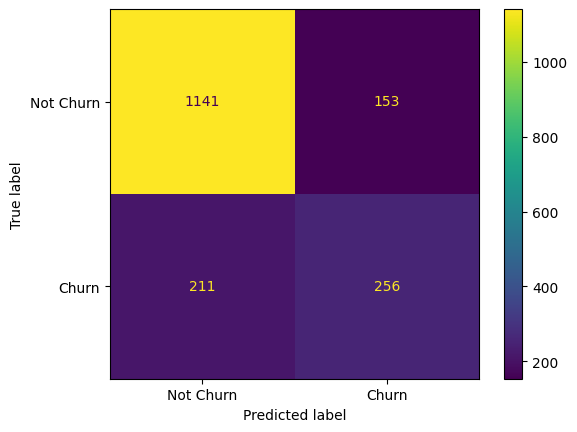

In [59]:
ConfusionMatrixDisplay.from_estimator(clf_xgb,X_test,y_test,display_labels=['Not Churn','Churn'])

In [63]:
param_grid = {
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200],
    'colsample_bytree': [0.7, 0.9],
    'subsample': [0.7, 0.9],
    'reg_lambda': [0.1, 1],
    'gamma': [0, 0.1],
}

# Initialize RandomizedSearchCV with fit_params for early stopping
random_search = RandomizedSearchCV(
    estimator=clf_xgb,
    param_distributions=param_grid,
    n_iter=20,
    scoring='roc_auc',
    cv=2,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit RandomizedSearchCV to the training data with early stopping and eval metric
random_search.fit(
    X_train,
    y_train,
)

# Print the best parameters found by RandomizedSearchCV
print("Best parameters found: ", random_search.best_params_)


Fitting 2 folds for each of 20 candidates, totalling 40 fits
Best parameters found:  {'subsample': 0.7, 'reg_lambda': 1, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.9}


In [66]:
clf_xgb = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='aucpr',
    seed=42,
    gamma = 0.25,
    learning_rate = 0.1,
    max_depth = 4,
    reg_lambda = 10,
    scale_pos_weight = 3,
    subsample = 0.9,
    colsample_bytree = 0.5
)

# Then, just pass eval_set to the fit method
clf_xgb.fit(
    X_train,
    y_train,
    verbose=True,
    eval_set=[(X_test, y_test)]
)

[0]	validation_0-aucpr:0.56899
[1]	validation_0-aucpr:0.61169
[2]	validation_0-aucpr:0.61375
[3]	validation_0-aucpr:0.62425
[4]	validation_0-aucpr:0.62737
[5]	validation_0-aucpr:0.62829
[6]	validation_0-aucpr:0.63042
[7]	validation_0-aucpr:0.62917
[8]	validation_0-aucpr:0.62823
[9]	validation_0-aucpr:0.63036
[10]	validation_0-aucpr:0.63204
[11]	validation_0-aucpr:0.63468
[12]	validation_0-aucpr:0.63387
[13]	validation_0-aucpr:0.63432
[14]	validation_0-aucpr:0.65608
[15]	validation_0-aucpr:0.65600
[16]	validation_0-aucpr:0.65659
[17]	validation_0-aucpr:0.66043
[18]	validation_0-aucpr:0.65687
[19]	validation_0-aucpr:0.66026
[20]	validation_0-aucpr:0.66094
[21]	validation_0-aucpr:0.66117
[22]	validation_0-aucpr:0.66359
[23]	validation_0-aucpr:0.66520
[24]	validation_0-aucpr:0.66442
[25]	validation_0-aucpr:0.66530
[26]	validation_0-aucpr:0.66593
[27]	validation_0-aucpr:0.66426
[28]	validation_0-aucpr:0.66318
[29]	validation_0-aucpr:0.66267
[30]	validation_0-aucpr:0.66277
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=0.25, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

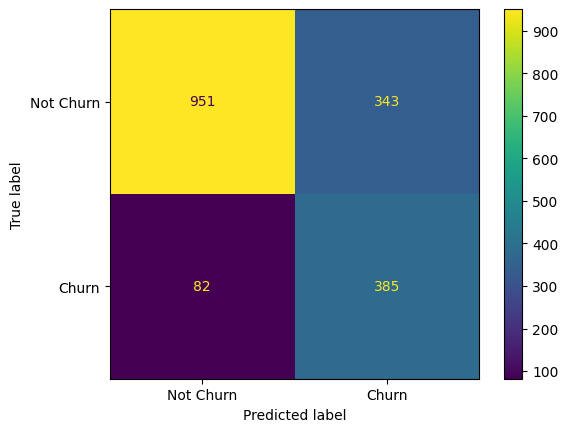

In [67]:
ConfusionMatrixDisplay.from_estimator(clf_xgb,X_test,y_test,display_labels=['Not Churn','Churn'])